# FancyArrow Test

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyArrow
from mpl_toolkits.mplot3d import proj3d, Axes3D

# For interactivity with plots
# %matplotlib widget 

RuntimeError: 'widget is not a recognised GUI loop or backend name

## Test Class

In [29]:
def arrows3d(ends, starts=None, ax=None, label=None, **kwargs):
    """3D plot of multiple arrows

    Args:
        ends (ndarray): (N, 3) size array of arrow end coordinates
        starts (ndarray): (N, 3) size array of arrow start coordinates.
            Assume start position of (0, 0, 0) if not given
        ax (Axes3DSubplot): existing axes to add to
        label (str): legend label to apply to this group of arrows
        kwargs (dict): additional arrow properties
    """
    if starts is None:
        starts = np.zeros_like(ends)

    assert starts.shape == ends.shape, "`starts` and `ends` shape must match"
    assert len(ends.shape) == 2 and ends.shape[1] == 3, \
        "`starts` and `ends` must be shape (N, 3)"

    class Arrow3D(FancyArrowPatch):
        def __init__(self, xs, ys, zs, *args, **kwargs):
            super().__init__((0,0), (0,0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def do_3d_projection(self, renderer=None):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
            self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

            return np.min(zs)

    # create new axes if none given
    if ax is None:
        ax = plt.figure().add_subplot(111, projection='3d')

    arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0)
    arrow_prop_dict.update(kwargs)
    for ind, (s, e) in enumerate(np.stack((starts, ends), axis=1)):
        a = Arrow3D(
            [s[0], e[0]], [s[1], e[1]], [s[2], e[2]],
            # only give label to first arrow
            label=label if ind == 0 else None,
            **arrow_prop_dict
        )
        ax.add_artist(a)

    # store starts/ends on the axes for setting the limits
    ax.points = np.vstack((starts, ends, getattr(ax, 'points', np.empty((0, 3)))))
    ax.set_xlim3d(ax.points[:, 0].min(),ax.points[:, 0].max())
    ax.set_ylim3d(ax.points[:, 1].min(),ax.points[:, 1].max())
    ax.set_zlim3d(ax.points[:, 2].min(),ax.points[:, 2].max())

    return ax

### Plot

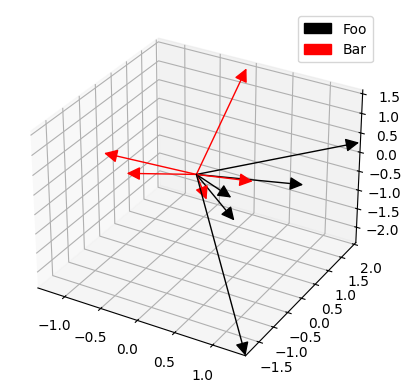

In [30]:
ax = arrows3d(np.random.normal(size=(5, 3)), label='Foo')
ax = arrows3d(np.random.normal(size=(5, 3)), ax=ax, color='r',label='Bar')
plt.legend()
plt.show()